In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import backtest as bt

In [72]:
btc = bt.fetch_price(start='2022-06', end='2024-09', asset='btcusdt', interval='4h')
btc

,close
timestamp,
2022-06-01 00:00:00,31624.0
2022-06-01 04:00:00,31479.6
2022-06-01 08:00:00,31596.0
2022-06-01 12:00:00,30733.7
2022-06-01 16:00:00,30116.5
...,...
2024-08-31 08:00:00,59093.1
2024-08-31 12:00:00,58983.7
2024-08-31 16:00:00,58834.2


H4 Double Rsi Momentum | rsi_short=17 | rsi_long=65
------------------------------------------
Sharpe                                1.34
Calmar                                1.40
------------------------------------------
Exposure                              0.37
No of Trades                           235
No of Data Points                     4939
Start Date             2022-06-01 00:00:00
End Date               2024-09-01 00:00:00
------------------------------------------
Annu Ret [%]                         41.41
Max DD [%]                          -29.61
Max DD Dur [days]                      200
Long/Short Ratio                 Long Only


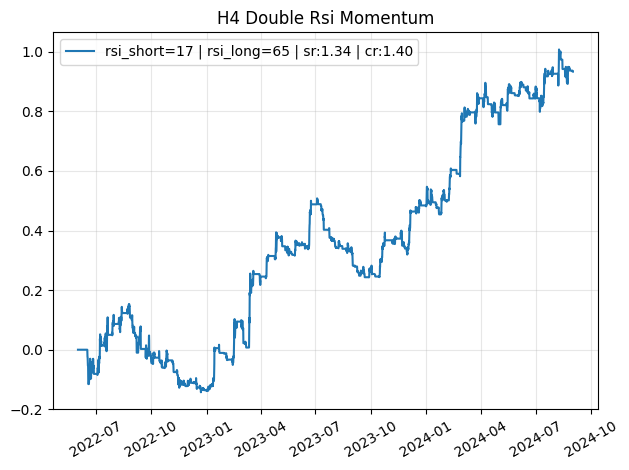

In [73]:
def double_rsi_momentum(df, rsi_short=14, rsi_long=25):
    rsi_short = int(rsi_short)
    rsi_long = int(rsi_long)
    
    df['rsi_short'] = bt.rsi(df['close'], rsi_short)
    df['rsi_long'] = bt.rsi(df['close'], rsi_long)
    
    df['spread'] = df['rsi_long'] - df['rsi_short']
    df['signal'] = np.where(df['spread'] < -5, 1, 0)
    
    return df['signal']

fee = bt.TransactionCost.bybit_taker

bt1 = bt.BacktestEngine(btc, double_rsi_momentum, btc, fee, rsi_short=17, rsi_long=65)
bt1.run()
bt1.report()

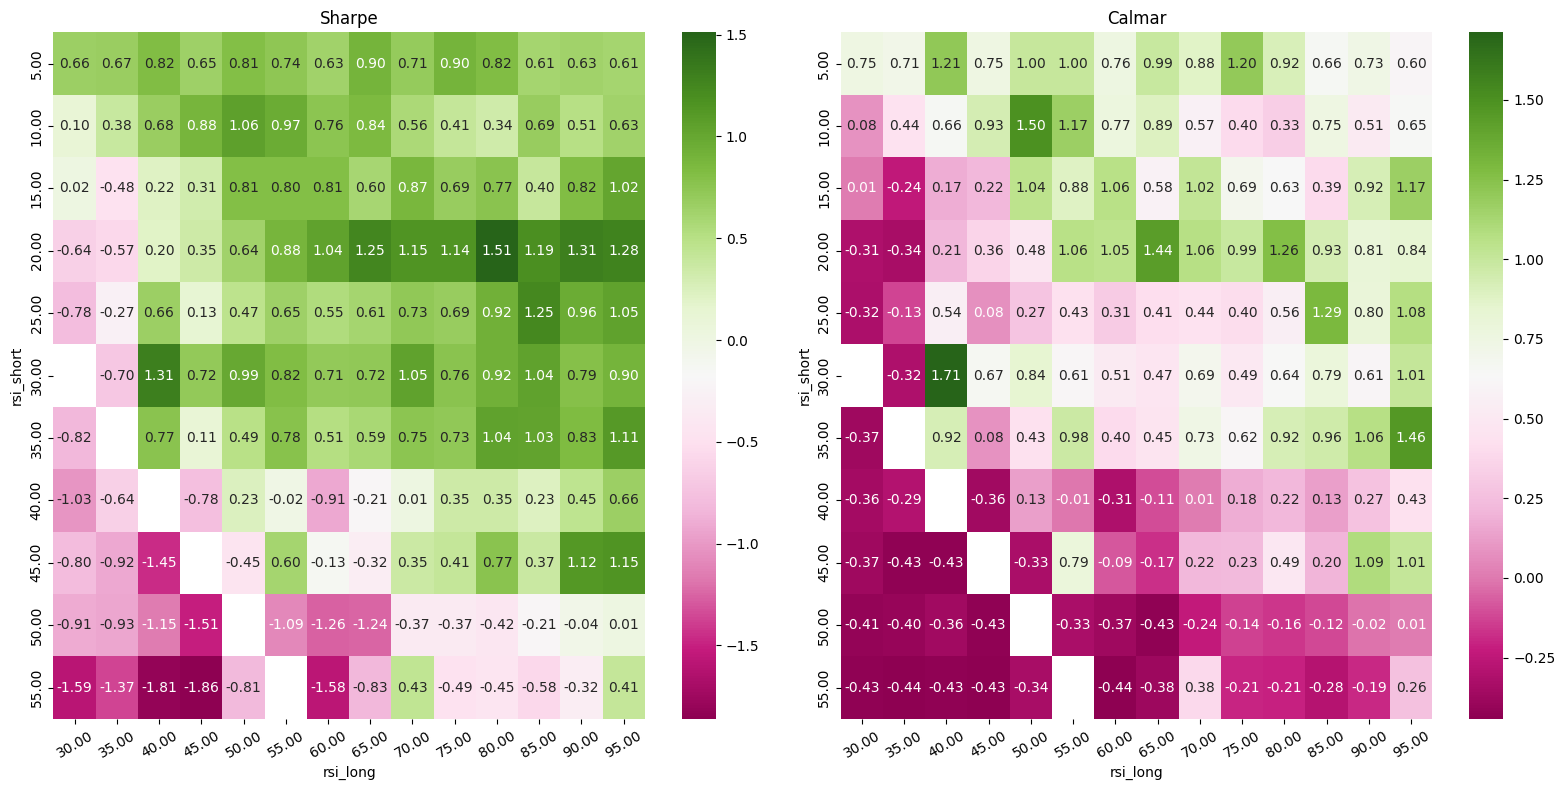

In [74]:
rsi_short = np.arange(5, 60, 5)
rsi_long = np.arange(30, 100, 5)

opt1 = bt.Optimizer(btc, double_rsi_momentum, btc, fee, rsi_short=rsi_short, rsi_long=rsi_long)
opt1.run()
opt1.plot_heatmap()

H4 Double Rsi Momentum | rsi_short=20 | rsi_long=80
------------------------------------------
Sharpe                                1.51
Calmar                                1.26
------------------------------------------
Exposure                              0.36
No of Trades                           214
No of Data Points                     4939
Start Date             2022-06-01 00:00:00
End Date               2024-09-01 00:00:00
------------------------------------------
Annu Ret [%]                         45.04
Max DD [%]                          -35.68
Max DD Dur [days]                      238
Long/Short Ratio                 Long Only


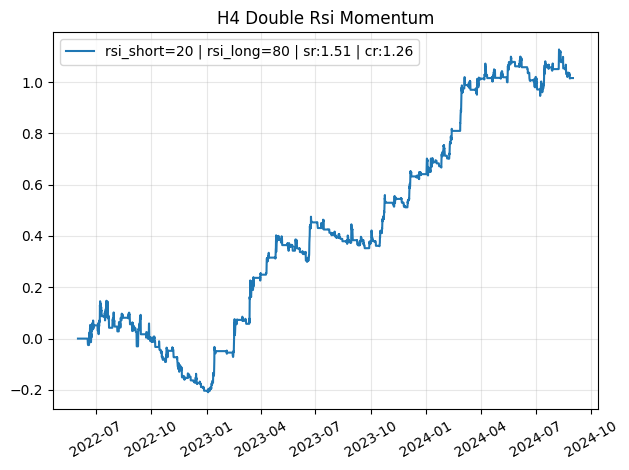

In [75]:
bt2 = bt.BacktestEngine(btc, double_rsi_momentum, btc, fee, rsi_short=20, rsi_long=80)
bt2.run()
bt2.report()

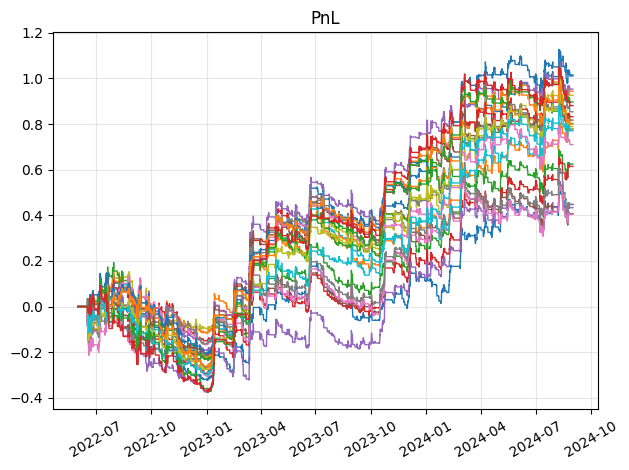

In [76]:
rsi_short = np.arange(16, 22, 2)
rsi_long = np.arange(60, 100, 5)

opt2 = bt.Optimizer(btc, double_rsi_momentum, btc, fee, rsi_short=rsi_short, rsi_long=rsi_long)
opt2.run()
opt2.plot_pnl()